These are the 10 Most Active Senders:
klansmen4trump    90
facists4trump     55
dawngpsalm63      26
skyjones55        24
jessnatenuff      24
FedoraPayan       23
Genie115          21
nathanTbernard    19
PatrickAnna       18
teed_chris        18
Name: Sender, dtype: int64


Top 10 Most Retweeted Texts:
                                                Text  RetweetCount
0  RT @zzzeeshaan: Alan Rickman died when he was ...          1642
1  RT @twaimz: 2016.   2 stick horses (one unicor...           820
2  RT @deray: Donald Trump. 2016. https://t.co/xg...           548
3  RT @revivaIariana: David Bowie died at 69. Ala...           415
4  RT @NathanZed: I cut together Donald Trump's r...           379
5  RT @leezachariah: Very sad to report that Dona...           357
6  RT @TheTweetOfGod: SPOT THE MISSING NUMBER  Da...           182
7  RT @mylastdilemma: David Bowie: 69 ans Alan Ri...           139
8  RT @AnneAnneAss: Michel Delpech : 69 ans. Davi...           135
9  RT @sahilkapur: Stagg

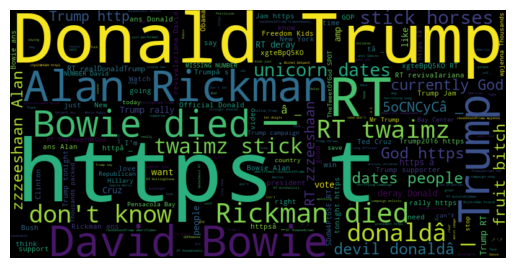

Subset 2 - Start Time: 2016-01-15 02:34:54, End Time: 2016-01-15 02:46:00


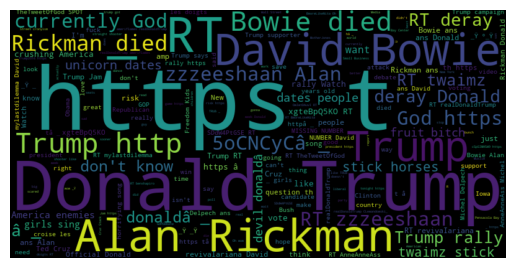

Subset 3 - Start Time: 2016-01-15 02:46:00, End Time: 2016-01-15 02:55:43


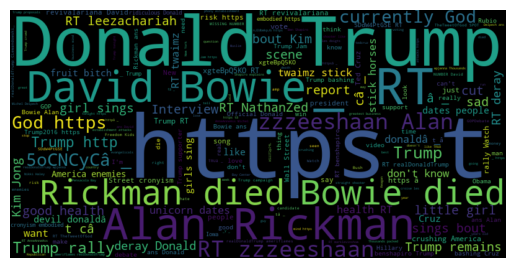

Subset 4 - Start Time: 2016-01-15 02:55:43, End Time: 2016-01-15 03:16:15


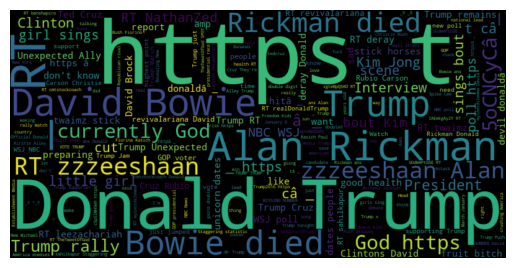

Subset 5 - Start Time: 2016-01-15 03:16:15, End Time: 2016-01-15 03:25:35


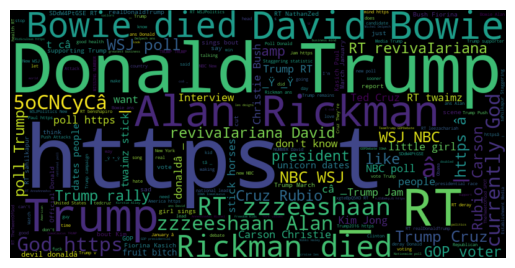

In [1]:
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tweet_data = pd.read_csv("tweets.csv", header=None, names = ["Sender", "Timestamp", "Text"])
tweet_data

#the 10 most active senders:
active_senders = tweet_data['Sender'].value_counts().head(10)
print("These are the 10 Most Active Senders:")
print(active_senders)
print("\n")

#10 most retweeted tweets:
retweeted_tweets = tweet_data[tweet_data['Text'].str.startswith("RT")]

retweeted_text_counts = retweeted_tweets['Text'].value_counts().reset_index()

retweeted_text_counts.columns = ['Text', 'RetweetCount']
top_retweeted_texts = retweeted_text_counts.head(10)

print("Top 10 Most Retweeted Texts:")
print(top_retweeted_texts)
print("\n")

#10 most cited screen names:
screen_names = tweet_data['Text'].apply(lambda x: re.findall(r'@(\w+)', x))

screen_names.value_counts()

screen_names = [item for sublist in screen_names for item in sublist]

pd.Series(screen_names)

screen_names = pd.Series(screen_names)
top_screen_names = screen_names.value_counts().head(10)

print("\nTop 10 Most Cited Screen-Names:")
print(top_screen_names)
print("\n")

# Check if the cited screen names are in the top senders list
common_screen_names = top_screen_names.index.intersection(active_senders.index)
print("Common Screen-Names in Top Cited and Top Senders:")
print(common_screen_names)
print("\n")

tweet_data

tweet_data['Timestamp'] = pd.to_datetime(tweet_data['Timestamp'], unit='s')
tweet_data.sort_values(by='Timestamp', inplace=True)
tweet_data.head(20)

#removing the stopwords from dataset:
stop_words = []

with open("stopwords_en.txt", "r") as file:
    for line in file:
        stop_words.append(line.strip())

#wordcloud:
subset_size = len(tweet_data) // 5
for i in range(5):
    start_idx = i * subset_size
    end_idx = (i + 1) * subset_size
    subset_text = " ".join(tweet_data['Text'].iloc[start_idx:end_idx])
    wordcloud = WordCloud(width=800, height=400, stopwords=stop_words).generate(subset_text)
    
    print(f"Subset {i+1} - Start Time: {tweet_data['Timestamp'].iloc[start_idx]}, End Time: {tweet_data['Timestamp'].iloc[end_idx-1]}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()